# Importing

In [615]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(42)

In [616]:
df = pd.read_csv('datasets/train.csv', keep_default_na=False)

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [617]:
test = pd.read_csv('datasets/test.csv', keep_default_na=False)

In [618]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60,8520,Pave,NA,Reg,Lvl,...,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,,9500,Pave,NA,IR1,Lvl,...,0,185,0,NA,NA,NA,0,7,2009,WD


In [619]:
df.head().T

,0,1,2,3,4
Id,109,544,153,318,255
PID,533352170,531379050,535304180,916386060,906425045
MS SubClass,60,60,20,60,50
MS Zoning,RL,RL,RL,RL,RL
Lot Frontage,,43,68,73,82
Lot Area,13517,11492,7922,9802,14235
Street,Pave,Pave,Pave,Pave,Pave
Alley,NA,NA,NA,NA,NA
Lot Shape,IR1,IR1,Reg,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl


In [620]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [621]:
df.isnull().sum().sum()

0

In [622]:
df._get_numeric_data().columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

#### Dropping Id and PID from the features list

In [623]:
df.drop(['Id', 'PID'], axis=1, inplace=True)

#### Saving the ID's to be added at the end for submission

In [624]:
test_id = test['Id']

In [625]:
test.drop(['Id', 'PID'], axis=1, inplace=True)

#### Rewriting/Ranking the Ordinal Features

In [626]:
df['Lot Shape'] = df['Lot Shape'].map({'IR3': 1, 'IR2': 2, 'IR1' : 3, 'Reg': 4})

df['Utilities'] = df['Utilities'].map({'AllPub': 3, 'NoSewr': 2, 'NoSeWa' : 1})

df['Land Slope'] = df['Land Slope'].map({'Sev': 1, 'Mod': 2, 'Gtl' : 1})

df['Exter Qual'] = df['Exter Qual'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

df['Exter Cond'] = df['Exter Cond'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

df['Bsmt Qual'] = df['Bsmt Qual'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

df['Bsmt Cond'] = df['Bsmt Cond'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'NA':0, 'No': 1, 'Mn': 2, 'Av' : 3, 'Gd':4})

df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec' : 3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec' : 3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

df['Heating QC'] = df['Heating QC'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd': 4, 'Ex': 5})

df['Electrical'] = df['Electrical'].map({'Mix': 1, 'FuseP': 2, 'FuseF' : 3, 'FuseA':4, 'SBrkr':5})

df['Kitchen Qual'] = df['Kitchen Qual'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

df['Functional'] = df['Functional'].map({'Sal': 1, 'Sev': 2, 'Maj2' : 3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})

df['Fireplace Qu'] = df['Fireplace Qu'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

df['Garage Finish'] = df['Garage Finish'].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

df['Garage Qual'] = df['Garage Qual'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

df['Garage Cond'] = df['Garage Cond'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

df['Paved Drive'] = df['Paved Drive'].map({'N':1, 'P':2, 'Y':3})

df['Pool QC'] = df['Pool QC'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

In [627]:
test['Lot Shape'] = test['Lot Shape'].map({'IR3': 1, 'IR2': 2, 'IR1' : 3, 'Reg': 4})

test['Utilities'] = test['Utilities'].map({'AllPub': 3, 'NoSewr': 2, 'NoSeWa' : 1})

test['Land Slope'] = test['Land Slope'].map({'Sev': 1, 'Mod': 2, 'Gtl' : 1})

test['Exter Qual'] = test['Exter Qual'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

test['Exter Cond'] = test['Exter Cond'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

test['Bsmt Qual'] = test['Bsmt Qual'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

test['Bsmt Cond'] = test['Bsmt Cond'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

test['Bsmt Exposure'] = test['Bsmt Exposure'].map({'NA':0, 'No': 1, 'Mn': 2, 'Av' : 3, 'Gd':4})

test['BsmtFin Type 1'] = test['BsmtFin Type 1'].map({'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec' : 3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

test['BsmtFin Type 2'] = test['BsmtFin Type 2'].map({'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec' : 3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

test['Heating QC'] = test['Heating QC'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd': 4, 'Ex': 5})

test['Electrical'] = test['Electrical'].map({'Mix': 1, 'FuseP': 2, 'FuseF' : 3, 'FuseA':4, 'SBrkr':5})

test['Kitchen Qual'] = test['Kitchen Qual'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

test['Functional'] = test['Functional'].map({'Sal': 1, 'Sev': 2, 'Maj2' : 3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})

test['Fireplace Qu'] = test['Fireplace Qu'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

test['Garage Finish'] = test['Garage Finish'].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

test['Garage Qual'] = test['Garage Qual'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

test['Garage Cond'] = test['Garage Cond'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

test['Paved Drive'] = test['Paved Drive'].map({'N':1, 'P':2, 'Y':3})

test['Pool QC'] = test['Pool QC'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

In [628]:
df.isnull().sum().sort_values(ascending=False)[:15]

Bsmt Exposure     4
BsmtFin Type 2    2
Garage Finish     1
BsmtFin Type 1    1
Bsmt Cond         1
Bsmt Qual         1
Garage Qual       1
Garage Cond       1
SalePrice         0
Exterior 2nd      0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exter Qual        0
Mas Vnr Type      0
dtype: int64

In [629]:
df.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [630]:
df = pd.get_dummies(df, columns=['Street', 'Sale Type', 'Bldg Type', 'House Style', 'Exterior 1st', 'Central Air'])
test = pd.get_dummies(test, columns=['Street', 'Sale Type', 'Bldg Type', 'House Style', 'Exterior 1st', 'Central Air'])

In [631]:
df = df._get_numeric_data()
test = test._get_numeric_data()

In [ ]:
df_sp = df['SalePrice']

In [632]:
# Making sure both datasets share the same dummy columns (Thanks to Grace for the code solution)
train_features = [col for col in df.columns if col in test.columns]
test_features = [col for col in test.columns if col in df.columns]

df = df[train_features]
test = test[test_features]

In [633]:
df.shape

(2051, 83)

In [634]:
test.shape

(879, 83)

#### Readding the SalePrice column to the dataframe as it was removed by the list comprehensions above

In [635]:
df['SalePrice'] = df_sp

In [636]:
df[df['Pool Area'] == 0].mean()[['SalePrice']]

SalePrice    181341.522037
dtype: float64

In [637]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2051.0,57.008776,42.824223,20.0,20.0,50.0,70.0,190.0
Lot Area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.5,159000.0
Lot Shape,2051.0,3.595807,0.566514,1.0,3.0,4.0,4.0,4.0
Utilities,2051.0,2.998537,0.049365,1.0,3.0,3.0,3.0,3.0
Land Slope,2051.0,1.042906,0.202694,1.0,1.0,1.0,1.0,2.0
Overall Qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.0,9.0
Year Built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.0,2010.0
Year Remod/Add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.0,2010.0
Exter Qual,2051.0,3.406143,0.587962,2.0,3.0,3.0,4.0,5.0


In [638]:
df.head().T

,0,1,2,3,4
MS SubClass,60.0,60.0,20.0,60.0,50.0
Lot Area,13517.0,11492.0,7922.0,9802.0,14235.0
Lot Shape,3.0,3.0,4.0,4.0,3.0
Utilities,3.0,3.0,3.0,3.0,3.0
Land Slope,1.0,1.0,1.0,1.0,1.0
Overall Qual,6.0,7.0,5.0,5.0,6.0
Overall Cond,8.0,5.0,7.0,5.0,8.0
Year Built,1976.0,1996.0,1953.0,2006.0,1900.0
Year Remod/Add,2005.0,1997.0,2007.0,2007.0,1993.0
Exter Qual,4.0,4.0,3.0,3.0,3.0


In [639]:
df.isnull().sum().sum()

0

#### Correlation Heat Map

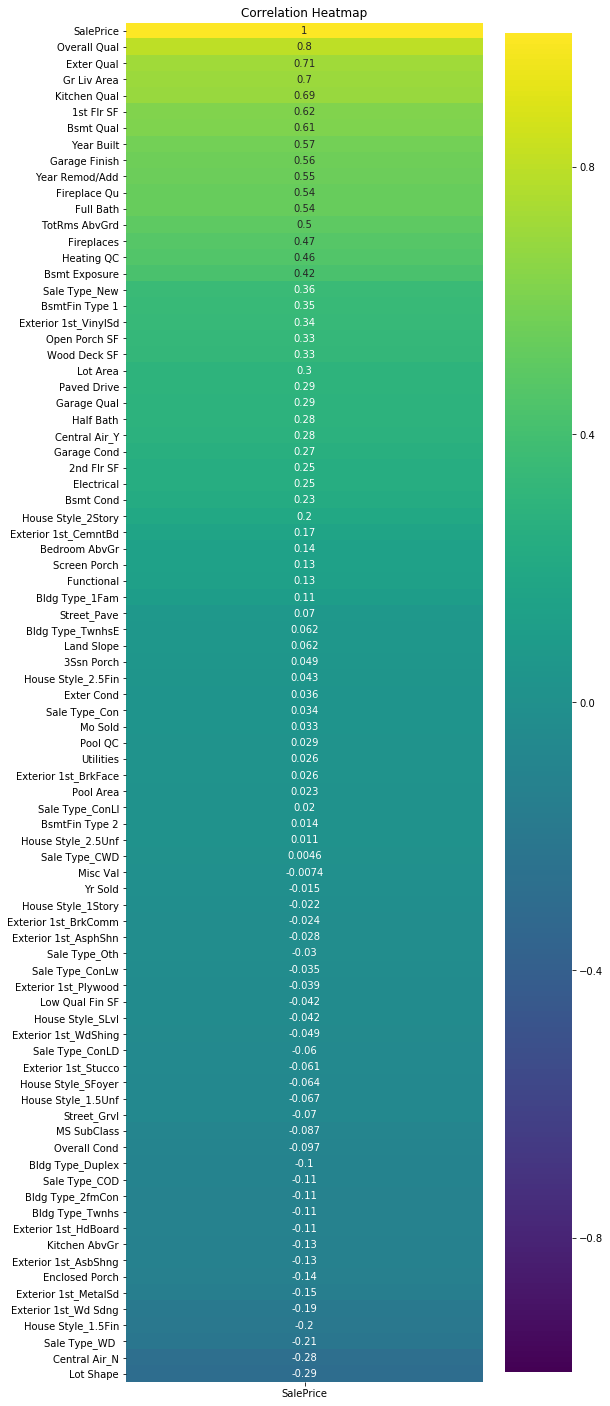

In [640]:
plt.figure(figsize=(8,25))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
           annot=True,
           vmin=-1,
           cmap='viridis')
plt.title('Correlation Heatmap');

#### Train-test splitting

In [641]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [642]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [643]:
pipe = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lcv', LassoCV())
])

In [644]:
pipe.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Pipeline(memory=None,
     steps=[('pf', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lcv', LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])

And it can be scored like any other model object:

In [645]:
pipe.score(X_train, y_train)

0.9299351771761737

In [646]:
pipe.score(X_test, y_test)

0.9074366088475351

In [647]:
pipe.named_steps

{'pf': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False),
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lcv': LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
     max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False)}

In [648]:
pipe.named_steps['lcv'].alpha_

707.7835425393689

In [649]:
min(pipe.named_steps['lcv'].alphas_)

66.00813006410769

In [650]:
max(pipe.named_steps['lcv'].alphas_)

66008.13006410773

Optimizing Alpha

In [651]:
pipe = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lcv', LassoCV(alphas=np.linspace(500, 900, 100)))
])

In [652]:
pipe.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Pipeline(memory=None,
     steps=[('pf', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lcv', LassoCV(alphas=array([500.    , 504.0404, ..., 895.9596, 900.    ]),
    copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))])

In [653]:
pipe.named_steps['lcv'].alpha_

706.060606060606

In [654]:
pipe.score(X_train, y_train)

0.9299666819719024

In [655]:
pipe.score(X_test, y_test)

0.9074133525605619

Coefficients

In [656]:
len(pipe.named_steps['lcv'].coef_)

3570

In [657]:
# how many have been zeroed out?
sum(pipe.named_steps['lcv'].coef_ == 0)/len(pipe.named_steps['lcv'].coef_)

0.9633053221288516

In [658]:
# remaining features
len(pipe.named_steps['lcv'].coef_) - (sum(pipe.named_steps['lcv'].coef_ == 0)/len(pipe.named_steps['lcv'].coef_) * len(pipe.named_steps['lcv'].coef_))

131.0

In [681]:
coef_df = pd.DataFrame({
    'coefs': pipe.named_steps['pf'].get_feature_names(X.columns),
    'vals': pipe.named_steps['lcv'].coef_
})
coef_df['abs'] = coef_df['vals'].map(lambda x: abs(x))
coef_df.sort_values(by='abs', ascending=False).drop('abs', axis=1)

NotFittedError: This PolynomialFeatures instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [660]:
df[(df['Misc Val'] > 0) & (df['Sale Type_New'])]

,MS SubClass,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,...,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Central Air_N,Central Air_Y,SalePrice
1885,20,39290,3,3,1,10,5,2008,2009,5,...,0,0,0,0,0,0,0,0,1,183850


In [661]:
df[(df['Sale Type_New']) & (df['Pool Area'] >= 1)]

,MS SubClass,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,...,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Central Air_N,Central Air_Y,SalePrice
960,60,63887,1,3,1,10,5,2008,2008,5,...,0,0,0,1,0,0,0,0,1,160000


#### Gridsearch

In [662]:
pipe = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lcv', LassoCV(alphas=np.linspace(500, 900, 100)))
])

In [663]:
params = {
    'pf__interaction_only': [True, False]
}

In [664]:
gs = GridSearchCV(pipe, params)

In [665]:
gs.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pf', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lcv', LassoCV(alphas=array([500.    , 504.0404, ..., 895.9596, 900.    ]),
    copy_X=True, cv='warn', eps=...lse,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'pf__interaction_only': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [666]:
gs.best_params_

{'pf__interaction_only': False}

In [667]:
gs.score(X_train, y_train)

0.9299666819719024

In [668]:
gs.score(X_test, y_test)

0.9074133525605619

In [669]:
gs.best_estimator_.named_steps['lcv'].alpha_

706.060606060606

In [670]:
# Number of features
len(gs.best_estimator_.named_steps['pf'].get_feature_names(X.columns))

3570

In [671]:
# Proportion of zeroed out features
sum(gs.best_estimator_.named_steps['lcv'].coef_ == 0)/len(gs.best_estimator_.named_steps['pf'].get_feature_names(X.columns))


0.9633053221288516

### Generating Predictions

In [673]:
test.head()

,MS SubClass,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,...,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Central Air_N,Central Air_Y
0,190,9142,4,3,1,6,8,1910,1950,3,...,0,0,0,0,0,0,0,0,1,0
1,90,9662,3,3,1,5,4,1977,1977,3,...,0,0,0,1,0,0,0,0,0,1
2,60,17104,3,3,1,7,5,2006,2006,4,...,0,0,0,0,0,1,0,0,0,1
3,30,8520,4,3,1,5,6,1923,2006,4,...,0,0,0,0,0,0,1,0,0,1
4,20,9500,3,3,1,6,5,1963,1963,3,...,0,0,0,1,0,0,0,0,0,1


In [674]:
test_X = test[X.columns]

In [675]:
preds = gs.predict(test_X)

In [676]:
preds

array([126303.46416201, 165310.12227937, 245016.02856295, 106627.25554748,
       174746.30667917,  93900.92319108, 112556.97307497, 171985.63577103,
       165680.85692653, 160141.60546393, 167811.79316086, 126623.3447968 ,
       148250.13641059, 264094.5570258 , 160245.00240918, 126284.56424809,
       137375.95414455, 120227.81171425, 196096.66723381, 207067.18187678,
       149427.45855624, 119036.01324793, 190725.10062896, 155625.34325204,
       184700.93627554, 118262.15320005, 135425.474718  , 141904.17275583,
       156439.01298064,  50609.11619071, 105644.29561983, 103130.93178837,
       225134.39565774, 154653.88168641, 252259.84746884, 182720.85448641,
       112175.82506335,  70086.4075855 , 125753.24674233, 177887.04877248,
       152460.73308012, 214796.16097038, 148030.1381086 , 183090.72441788,
       223023.21202395,  97844.01051137, 227750.93088702, 118987.51005554,
       128730.82197721, 121038.36302854, 113933.62551364, 223215.83342168,
       243593.81897367, 1

In [677]:
from datetime import datetime

In [678]:
test['Id'] = test_id

In [680]:
timestamp = str(datetime.now()).split('.')[0]

to_submit = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': preds
})

to_submit.to_csv(f'my_submission_{timestamp}.csv', index=False)